In [1]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename, quality):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np

# Load the model
model = load_model('keras_model.h5')
labels = [line for line in open("labels.txt")]

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
data2 = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
# Replace this with the path to your image
image = Image.open('photo.jpg')
image2 = Image.open('photo2.jpg')
#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)
image2 = ImageOps.fit(image2, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)
image_array2 = np.asarray(image2)
# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
normalized_image_array2 = (image_array2.astype(np.float32) / 127.0) - 1
# Load the image into the array
data[0] = normalized_image_array
data2[0] = normalized_image_array2

# run the inference
prediction = model.predict(data)
prediction2 = model.predict(data2)
# print(prediction)
choice = np.argmax(prediction)
choice2 = np.argmax(prediction2)

# ai_choice = np.random.randint(3)
print(labels[choice] + " vs \n" + labels[choice2])
if choice == 3:
  print("You didn't play anything! You lose.")
elif (choice + 1) % 3 == choice2:
  print("Player 1 wins!")
elif choice == choice2:
  print("Draw!")
else:
  print("Player 2 wins!")


1 Scissors
 vs 
2 Paper

Player 1 wins!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saved to photo.jpg
Saved to photo2.jpg


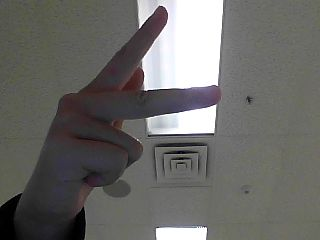

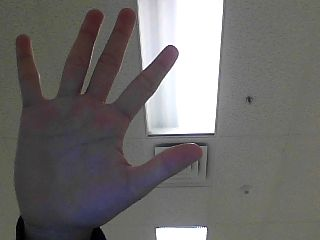

In [ ]:
from IPython.display import Image
try:
  filename = take_photo('photo.jpg', 0.8)
  filename2 = take_photo('photo2.jpg', 0.8)
  print('Saved to {}'.format(filename))
  print('Saved to {}'.format(filename2))

  # Show the image which was just taken.
  display(Image(filename))
  display(Image(filename2))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
